# Plot Spectrogram Output from LabChart
The following script will plot your spectrogram data from LabChart. <b>Before running this script</b>, follow <a href="https://docs.google.com/document/d/10_W9PGSXKUa4Q5WomSvkqedJ3AG9JJ2rdvOwTQlJb68/edit#heading=h.bmi3woylh7rm">these instructions</a> to clean your data in Excel.

### Step 1. Import necessary toolboxes & our exported EEG file.
You will need to change the file directory below to match the path and filename of your EEG spectrogram .txt file.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina' # configure high-resolution plotting

# change your file name here
filename = 'SpectrumData.txt'

labchart_output = np.genfromtxt(filename)

np.set_printoptions(precision=2)

print('LabChart data imported:')
print(labchart_output)

LabChart data imported:
[[     nan 0.00e+00 3.91e-01 ... 1.99e+02 2.00e+02 2.00e+02]
 [5.44e+00 1.91e-13 7.17e-10 ... 5.72e-20 6.52e-24 6.21e-21]
 [5.60e+00 1.73e-11 5.79e-10 ... 3.72e-20 8.97e-21 9.66e-23]
 ...
 [2.88e+01 3.72e-13 9.87e-12 ... 5.51e-20 1.92e-20 1.94e-23]
 [2.90e+01 8.18e-13 3.92e-11 ... 5.24e-20 2.67e-20 1.33e-21]
 [2.91e+01 1.41e-12 7.30e-11 ... 4.49e-20 1.79e-20 2.83e-22]]


### Step 2. Clean data.
We still need to clean up the data a little bit, since the frequency labels (in the 0th row) are also in here, along with the time labels in the first column. Let's save these frequency & time labels, and then only save the necessary rows of our dataset. We should be left with an array that is just the actual data.

In [2]:
frequency = labchart_output[0,1:] # from old way of importing
time = labchart_output[1:,0]
time = time-time[0]
recording_length = time[-1] - time[0]

spectrum = labchart_output[0:,1:]

print('Frequency range is ' + str(frequency[0]) + ' to ' + str(frequency[-1]) + ' Hz.')
print('Recording length is ' + str(recording_length) + ' seconds.') 

Frequency range is 0.0 to 200.0 Hz.
Recording length is 23.68 seconds.


### Step 3. Rotate & flip array and subselect frequencies to plot.
Next, let's rotate & flip the frequency array so that it matches our conventional spectrogram format (time on y axis, frequencies going up the x axis). We'll also subselect the frequencies we want, rather than plotting up to 200 Hz.

In [22]:
# set your max frequency below
max_frequency = 50

# round our frequency values so we can find one that matches our max frequency
freq_rounded = np.round(frequency)
freq_IDs = np.where(freq_rounded == max_frequency)

# create a new frequency axis
freq_short = freq_rounded[0:freq_IDs[0][0]]

# cut down the spectrum to only our desired frequencies
spectrum_clean = spectrum[:,0:freq_short.shape[0]]

# rotate the spectrum to match typical spectrogram format
spectrum_rotated = np.rot90(spectrum_clean)
freq_labels = np.flip(freq_short,axis=0)

print('Your data will plot with a maximum frequency of '+str(max_frequency))

Your data will plot with a maximum frequency of 50


### Step 4. Plot the data!
Depending on the power in your dataset, you may need to change the maximum power plotted on the color bar. To do so, change the variable "max_v".

In [28]:
num_ticks = 10

yticks = np.linspace(0, len(freq_labels) - 1, num_ticks, dtype=np.int)
yticklabels = [freq_labels[idx] for idx in yticks]

xticks = np.linspace(0, len(time)-1, num_ticks, dtype=np.int)
xticklabels = [round(time[idt],2) for idt in xticks]

# use the line below to change the heatmap scale bar
max_v = 1e-11

print('Your data will plot with a maximum V^2 of '+str(max_v))

Your data will plot with a maximum V^2 of 1e-11


### Plot, using our settings!

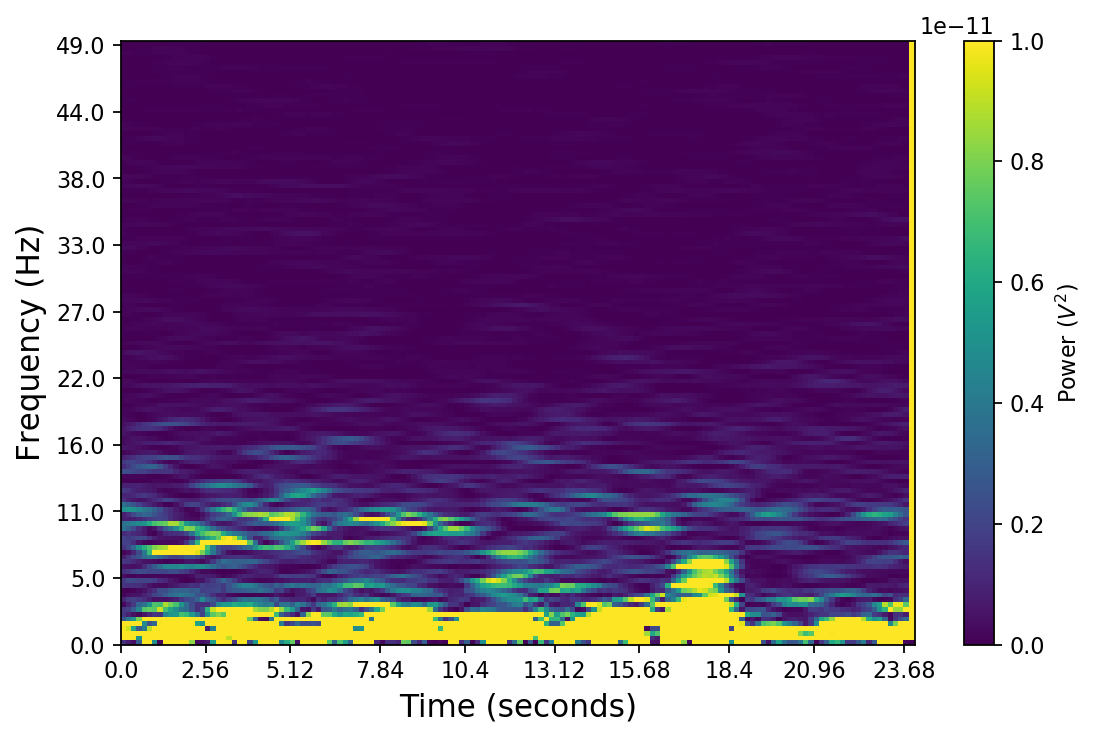

In [33]:
# you can change figsize below to change the size of your figure
fig,ax = plt.subplots(1,1,figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.pcolor(np.flip(spectrum_rotated),vmax=max_v)

# Fix axes
ax.set_yticks(yticks)
ax.set_yticklabels([freq_short[idx] for idx in yticks])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

ax.set_ylabel('Frequency (Hz)',fontdict={'fontsize':14})
ax.set_xlabel('Time (seconds)',fontdict={'fontsize':14})

cbar = plt.colorbar()
cbar.ax.set_ylabel('Power ($V^2$)')


plt.show()

### Step 5. Right click on the image above to save it for your lab report.

If you want to run this code again on a different dataset, we need to clear all of the variables. Run the reset code block below to do so. It will also prompt you to make sure you want to proceed. Type y and press enter.

In [ ]:
%reset

## Optional code
This code is currently not functional!

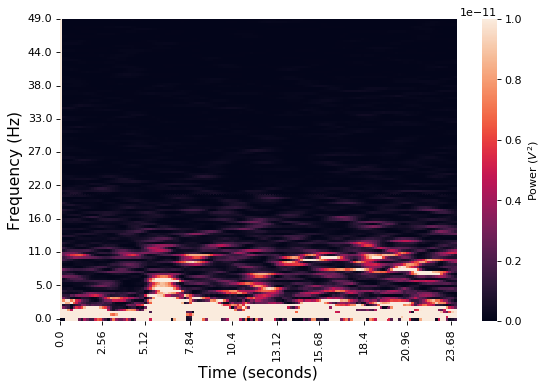

In [11]:
## PLOT WITH SEABORN
import seaborn as sns

# you can change figsize below to change the size of your figure
fig=plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

ax = sns.heatmap(spectrum_rotated,vmin=0,vmax=max_v,
                 yticklabels=yticklabels,xticklabels=xticklabels,
                 cbar_kws={'label': 'Power ($V^2$)'})

ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.set_ylabel('Frequency (Hz)',fontdict={'fontsize':14})
ax.set_xlabel('Time (seconds)',fontdict={'fontsize':14})

plt.show()

In [ ]:
# This is just bonus code for working with an unclean dataset

# figure out how many rows are in the file
# n_footer_rows = labchart_output.shape[0]+1 

# extract frequency row, only.
#frequency = np.genfromtxt(filename,skip_header=2,skip_footer=n_footer_rows)
#frequency = frequency[1:]

#if frequency.shape[0] != 514:
#    print('Error in importing frequency row.')
    